In [2]:
# Core Libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To display plots inline
%matplotlib inline


In [4]:
# Replace 'path_to_dataset.csv' with the actual file path
data = pd.read_csv(r"D:\codesoft\Medicine_Details.csv")

# Display the first few rows to verify the dataset is loaded correctly
print(data.head())


              Medicine Name  \
0   Avastin 400mg Injection   
1  Augmentin 625 Duo Tablet   
2       Azithral 500 Tablet   
3          Ascoril LS Syrup   
4         Aciloc 150 Tablet   

                                         Composition  \
0                                Bevacizumab (400mg)   
1    Amoxycillin  (500mg) +  Clavulanic Acid (125mg)   
2                               Azithromycin (500mg)   
3  Ambroxol (30mg/5ml) + Levosalbutamol (1mg/5ml)...   
4                                 Ranitidine (150mg)   

                                                Uses  \
0   Cancer of colon and rectum Non-small cell lun...   
1                  Treatment of Bacterial infections   
2                  Treatment of Bacterial infections   
3                      Treatment of Cough with mucus   
4  Treatment of Gastroesophageal reflux disease (...   

                                        Side_effects  \
0  Rectal bleeding Taste change Headache Noseblee...   
1  Vomiting Nausea Diarrhea

In [11]:
# Encode categorical variable (Manufacturer)
le = LabelEncoder()
data['Manufacturer_Encoded'] = le.fit_transform(data['Manufacturer'])

# Select features and target
X = data[['Manufacturer_Encoded', 'Average Review %', 'Poor Review %']].values
y = data['Excellent Review %'].values

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler




In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("Linear Regression MSE:", mean_squared_error(y_test, y_pred))


Linear Regression MSE: 8.32236580533883e-29


In [13]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print("Decision Tree MSE:", mean_squared_error(y_test, y_pred))


Decision Tree MSE: 0.30739957716701904


In [14]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Random Forest MSE:", mean_squared_error(y_test, y_pred))


Random Forest MSE: 0.12182262156448205


In [15]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

print("Gradient Boosting MSE:", mean_squared_error(y_test, y_pred))


Gradient Boosting MSE: 1.2960322981382686


In [16]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print("XGBoost MSE:", mean_squared_error(y_test, y_pred))


XGBoost MSE: 0.08330275337353862


In [20]:


from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(random_state=42)
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)

print("LightGBM MSE:", mean_squared_error(y_test, y_pred))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000613 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 395
[LightGBM] [Info] Number of data points in the train set: 9460, number of used features: 3
[LightGBM] [Info] Start training from score 38.656025
LightGBM MSE: 0.18715327820056574


In [19]:
pip install lightgbm

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.4 MB 4.2 MB/s eta 0:00:01
   ----------------------------- ---------- 1.0/1.4 MB 2.4 MB/s eta 0:00:01
   ------------------------------------ --- 1.3/1.4 MB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 2.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
from catboost import CatBoostRegressor

catboost = CatBoostRegressor(verbose=0, random_state=42)
catboost.fit(X_train, y_train)
y_pred = catboost.predict(X_test)

print("CatBoost MSE:", mean_squared_error(y_test, y_pred))


CatBoost MSE: 0.01394120313429937


In [22]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

print("SVR MSE:", mean_squared_error(y_test, y_pred))


SVR MSE: 0.3239989037175431


In [23]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("KNN MSE:", mean_squared_error(y_test, y_pred))


KNN MSE: 1.1797716701902747


In [24]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

print("MLP Regressor MSE:", mean_squared_error(y_test, y_pred))


MLP Regressor MSE: 0.005395219529296306


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000743 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 395
[LightGBM] [Info] Number of data points in the train set: 9460, number of used features: 3
[LightGBM] [Info] Start training from score 38.656025


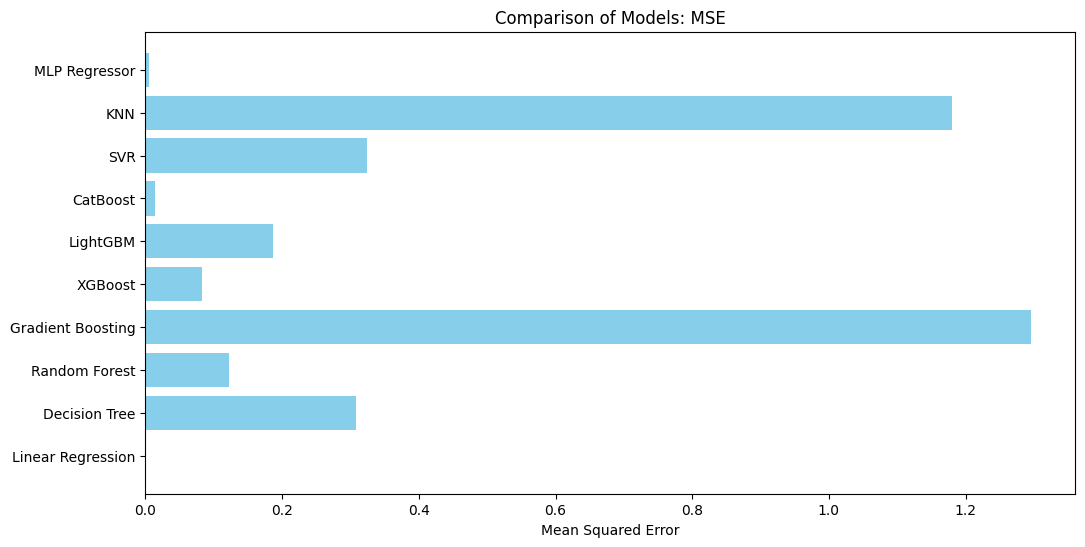

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# List of models (as shown earlier)
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "LightGBM": LGBMRegressor(random_state=42),
    "CatBoost": CatBoostRegressor(verbose=0, random_state=42),
    "SVR": SVR(kernel='rbf'),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "MLP Regressor": MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
}

# List to store MSE for each model
model_mse = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    model_mse.append(mse)

# Plotting MSE for each model
plt.figure(figsize=(12, 6))
plt.barh(list(models.keys()), model_mse, color='skyblue')
plt.xlabel('Mean Squared Error')
plt.title('Comparison of Models: MSE')
plt.show()


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000985 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 395
[LightGBM] [Info] Number of data points in the train set: 9460, number of used features: 3
[LightGBM] [Info] Start training from score 38.656025


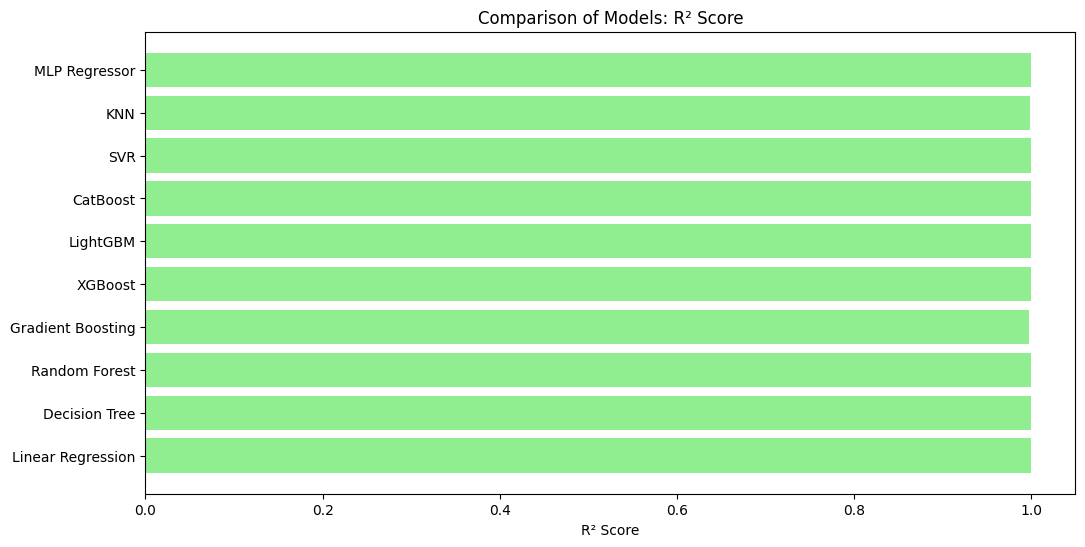

In [26]:
# List to store R² scores for each model
model_r2 = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    model_r2.append(r2)

# Plotting R² scores for each model
plt.figure(figsize=(12, 6))
plt.barh(list(models.keys()), model_r2, color='lightgreen')
plt.xlabel('R² Score')
plt.title('Comparison of Models: R² Score')
plt.show()
